{'infer_column_types': 'False', 'activity': 'download'}
{'infer_column_types': 'False', 'activity': 'download', 'activityApp': 'FileDataset'}
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmp9ibr4cml/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/yellow/puYear=2016/puMonth=1/part-00000-tid-8898858832658823408-a1de80bd-eed3-4d11-b9d4-fa74bfbd47bc-426339-90.c000.snappy.parquet
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmp9ibr4cml/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/yellow/puYear=2016/puMonth=1/part-00008-tid-8898858832658823408-a1de80bd-eed3-4d11-b9d4-fa74bfbd47bc-426341-90.c000.snappy.parquet
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmp9ibr4cml/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/yellow/puYear=2016/puMonth=1/part-00016-tid-8898858832658823408-a1de80bd-eed3-4d11-b9d4-fa74bfbd47bc-426328-88.c000.snappy.parquet
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmp9ibr4c

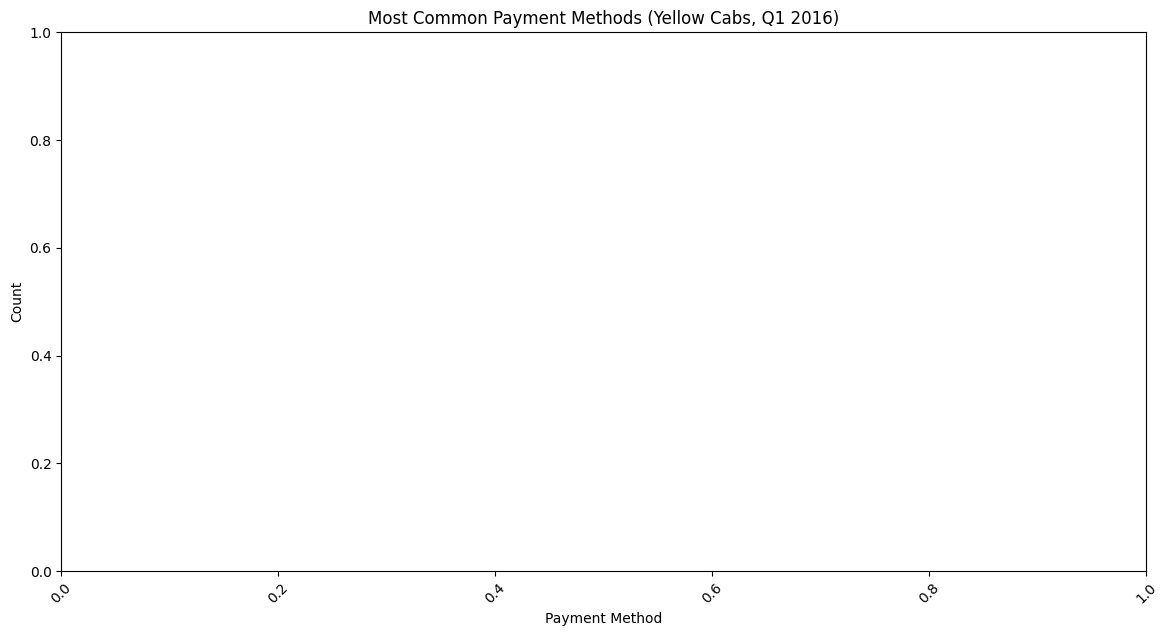

NameError: name 'yellow_payment_by_hsour' is not defined

<Figure size 1400x700 with 0 Axes>

In [2]:
# Import necessary libraries
from azureml.opendatasets import NycTlcYellow
from dateutil import parser
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Set the logging level to ERROR to suppress verbose logging
logging.getLogger('azureml.opendatasets').setLevel(logging.ERROR)

# Set the date range for Q1 2016
start_date = parser.parse('2016-01-01')
end_date = parser.parse('2016-03-31')

# Fetch the yellow cab dataset
nyc_tlc_yellow = NycTlcYellow(start_date=start_date, end_date=end_date)
nyc_tlc_yellow_df = nyc_tlc_yellow.to_pandas_dataframe()

# Filter out rows with invalid coordinates and create a copy to avoid SettingWithCopyWarning
nyc_tlc_yellow_df = nyc_tlc_yellow_df[(nyc_tlc_yellow_df['startLat'].between(40, 42)) & 
                                      (nyc_tlc_yellow_df['startLon'].between(-75, -72)) &
                                      (nyc_tlc_yellow_df['endLat'].between(40, 42)) &
                                      (nyc_tlc_yellow_df['endLon'].between(-75, -72))].copy()

# Map payment type codes to meaningful names
payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}
nyc_tlc_yellow_df['payment_type'] = nyc_tlc_yellow_df['paymentType'].map(payment_mapping)

# Analysis for the most common payment method for all Q1 2016
yellow_payment_counts = nyc_tlc_yellow_df['payment_type'].value_counts()

# Plot the most common payment methods for all Q1 2016
plt.figure(figsize=(14, 7))
sns.barplot(x=yellow_payment_counts.index, y=yellow_payment_counts.values, palette='viridis', dodge=False)
plt.title('Most Common Payment Methods (Yellow Cabs, Q1 2016)')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('yellow_payment_methods.png')
plt.show()

# Analysis for payment methods by hour of the day
nyc_tlc_yellow_df['pickup_hour'] = pd.to_datetime(nyc_tlc_yellow_df['tpepPickupDateTime']).dt.hour
yellow_payment_by_hour = nyc_tlc_yellow_df.groupby(['pickup_hour', 'payment_type']).size().unstack().fillna(0)

# Plot payment methods by hour of the day
plt.figure(figsize=(14, 7))
yellow_payment_by_hsour.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 7))
plt.title('Payment Methods by Hour of the Day (Yellow Cabs, Q1 2016)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Payment Methods')
plt.savefig('yellow_payment_methods_by_hour.png')
plt.show()

# Save results to CSV files
yellow_payment_counts.to_csv('yellow_payment_counts.csv', header=['Count'])
yellow_payment_by_hour.to_csv('yellow_payment_by_hour.csv')
